![housesbanner.png](attachment:housesbanner.png)

Time flies! You have now learned and (hopefully) mastered all the skills required to build a real-world ML regression model! These skills include:

- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparamter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

We will join this active Kaggle competition to predict house prices:


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

You will find the detailed description of the competition from above web site, and can download the data directly there. 

**Requirements:**

- Please use this notebook to create your code, explanation, graphs, and results just like what you did for your homework.
- This is an individual project. You are free to discuss with your classmates but you should complete the project on your own (ie, you cannot copy code...).
- You should create a Kaggle account and submit the prediction of your model in Kaggle individually. Please add "SCU_" in front of your team name so that you can check how you rank among your classmates in the Leaderboard. However, you do not have to use your real name in your team name.
- You can submit your results multiple times in Kaggle. Therefore you are encouraged to submit your model, improve, then re-submit. It is a continuous learning process.
- **Please include a screenshot of your best Kaggle submission at the bottom of this notebook showing your rank and score in the leaderboard.**
- You are also encouraged to read discussion forums to learn and get your inspiration, but code copying is strictly forbidden.
- **Honor code: again, you cannot copy code, neither from classmates nor from any online discussion forums. We will check your code and you may be asked to present in class (so you need to be extremely familiar with your work)!**

### Good luck!

In [3]:
# your code starts here:

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
# os.chdir('My drive/ML_Course_Project')

traindf=pd.read_csv('train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindf.head()


In [ ]:
traindf.shape

In [ ]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission

In [4]:
#Data Preprocessing
testdf= pd.read_csv('test.csv')
testdf
#Checking for nans

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
import numpy as np

#Selcting numerical features
num_feat_testdf=testdf.select_dtypes(include=np.number)

# #Dropping nas
# num_feat_testdf=num_feat_testdf.dropna()

#Drop features that have many nas
num_feat_testdf.drop(columns=['LotFrontage','MasVnrArea'],inplace=True)

num_feat_testdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [6]:

num_feat_testdf.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [7]:
traindf.isnull().values.any()
#Preparation of train and test datasets from the givem dataset.
# from sklearn.preprocessing import train_test_split

True

In [8]:
# target=traindf['SalePrice']
target= num_feat_traindf['SalePrice']
target

NameError: ignored

In [9]:
target.isnull().sum()

NameError: ignored

In [10]:
features=traindf.iloc[:,0:79]

In [11]:
#Check for missing values
total_missing_data =traindf.isna().sum().sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values' :total_missing_data})

missing_data.head(20)

,Missing Values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


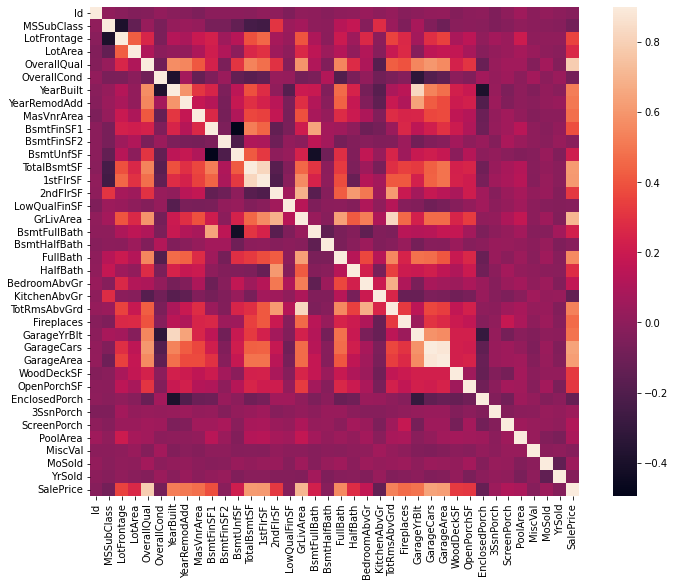

In [12]:
#Correlation map to see how features are correlated with SalePrice
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = traindf.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.9, square=True)

In [13]:
import numpy as np

#Selecting numerical features from the train dataset
num_feat_traindf=traindf.select_dtypes(include=np.number)

#Dropping nas
num_feat_traindf_features=num_feat_traindf.dropna
num_feat_traindf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
#num_feat_traindf= num_feat_traindf.drop(columns=['MasVnrArea'],axis=1)
num_feat_traindf.isna().sum()
num_feat_traindf.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [34]:
#Drop nas
num_feat_traindf= num_feat_traindf.dropna()

# #Drop columns with many nans
# num_feat_traindf= num_feat_traindf.drop(columns=['LotFrontage','GarageYrBlt','MasVnrArea'],axis=1)


#Drop the year column
num_feat_traindf


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
num_feat_traindf.set_index('Id')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [17]:
target=num_feat_traindf['SalePrice']
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
display(num_feat_traindf)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


Among the numerical features, LotFrontage and GarageYearBuilt have 259 and 81 nulls respectively.

For now, I am excluding those features and fitting the model. In the 2nd time, I will include those features but drop nan rows and then perform model fitting.

3rd time, I am going to impute the null values with the with the mean of the particular column and proceed ahead.

In [19]:
target.isnull().sum()
target.isna().sum()

0

In [20]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [52]:
#Fitting a ML model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(num_feat_traindf,target)


LinearRegression()

#Finding the coefficients of the plot

In [53]:
print(lr.coef_)


[-1.57033613e+00 -1.62043583e+02  3.93529968e-01  1.78673614e+04
  4.43834247e+03  3.46599894e+02  1.36095592e+02  1.18143776e+01
 -2.77238271e+00  7.81550249e-01  9.82354511e+00  1.91434191e+01
  1.90537801e+01 -6.60364521e+00  3.15935539e+01  8.55978466e+03
  2.41313501e+03  3.60827325e+03 -1.28944249e+03 -1.05114341e+04
 -1.31089080e+04  5.16033233e+03  3.56475962e+03  1.06671300e+04
  1.46195515e+00  2.61687577e+01 -5.62631378e+00  8.67404295e+00
  1.76644445e+01  5.78098509e+01 -4.15085658e+01 -8.98520043e-01
 -1.07892813e+02 -7.52141893e+02]


Finding the intercepts for the model

In [54]:
print(lr.intercept_)

494629.77780977346


Feature names seen during fit

In [24]:
print(lr.feature_names_in_)

['Id' 'MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']


In [25]:
print(lr.singular_)

[3.03622890e+06 3.67561436e+05 2.23765412e+04 2.05808490e+04
 1.88905955e+04 1.67814539e+04 1.59490993e+04 8.52940463e+03
 6.68990964e+03 6.24162959e+03 4.49210110e+03 2.44163770e+03
 2.23982653e+03 2.11789467e+03 2.03141934e+03 1.48953531e+03
 1.47606095e+03 1.11008132e+03 8.50273666e+02 5.50537954e+02
 1.02956783e+02 4.95928489e+01 3.66370569e+01 3.49821112e+01
 2.80449795e+01 2.05315267e+01 1.87594310e+01 1.60763864e+01
 1.43982445e+01 1.23415319e+01 1.07131390e+01 8.21886265e+00
 6.59877151e+00 3.33024771e-10 3.33024771e-10]


In [26]:
num_feat_traindf.replace([np.inf, -np.inf], np.nan, inplace=True)
num_feat_traindf.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
# num_feat_traindf.drop(columns=['LotFrontage'],axis=1)
# num_feat_traindf.isna().sum()
# # target.isna().sum()



In [46]:
num_feat_testdf=num_feat_testdf.dropna()
num_feat_testdf.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [28]:
# #Ctegorical features in traindf

# cat_feat_traindf= 

# cols = traindf.columns

# # num_cols = df._get_numeric_data().columns
# num_cols=num_feat_traindf.columns

# list(set(cols) - set(num_cols))



**Defining numerical features testdf**

num_

In [29]:
# num_feat_testdf.drop(columns=['MasVnrArea'],axis=1)

print(num_feat_testdf.isnull().sum())
print(num_feat_testdf.shape)
print(num_feat_traindf.shape)

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64
(1459, 35)
(1460, 35)


In [50]:
num_feat_traindf=num_feat_traindf.drop(columns='SalePrice')
num_feat_traindf.columns


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [49]:
num_feat_testdf.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [40]:
num_feat_testdf=num_feat_testdf.drop(columns=['GarageYrBlt'])

num_feat_testdf.dropna()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [31]:
num_feat_testdf.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
print(num_feat_testdf.columns)

In [41]:
num_feat_testdf

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [55]:
# #Predictions
predictions=lr.predict(num_feat_testdf)
print(type(predictions))
# testdf.columns
# testdf.GarageYrBlt

# predictionsdf = pd.DataFrame({'SalePrice': predictions})
predictionsdf=pd.DataFrame(predictions)
# predictionsdf=predictionsdf.rename(columns={'0': 'SalePrice'})
predictionsdf

<class 'numpy.ndarray'>


,0
0,120827.342151
1,151525.047456
2,175893.137139
3,202336.049876
4,199843.720785
...,...
1451,53514.601444
1452,63726.426031
1453,176166.670436
1454,100118.180143


In [58]:
num_feat_traindf1= num_feat_traindf.iloc[0:1456]

In [56]:
predictionsdf.to_csv('predictions.csv')

In [62]:
target1=target.iloc[0:1456]


**Get the feature importance of the plots**

In [ ]:
#features.columns.to_list()

In [ ]:
# import seaborn
# seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1))

##Hyperparameter tuning using GridSearchCV

In [ ]:
print('linear model coeff (w): {}'
     .format(lr.coef_))
print('linear model intercept (b): {:.3f}'
     .format(lr.intercept_))
print('R-squared score: {:.3f}'
     .format(lr.score(num_feat_traindf, target)))

In [66]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score 

#For the train dataset
print("Mean absolute error for the train dataset is: ", mae(target1,predictionsdf))

print("Mean square error for the train dataset is: ", mse(target1,predictionsdf))


# from sklearn.metrics import accuracy_score
# print(accuracy_score(target1,predictionsdf))


# print("Coefficient of determination for the train dataset is: ", r2_score(num_feat_testdf,predictionsdf))



Mean absolute error for the train dataset is:  79199.34394137442
Mean square error for the train dataset is:  79199.34394137442


ValueError: ignored

In [ ]:
#Pairwise correlation amongst the features

Using Simple Imputer with different strategies to replace the missing values

In [ ]:
# poly10 = PolynomialFeatures(degree=10, include_bias=False)
# scaler = StandardScaler()
# lin_reg2 = LinearRegression()

# pipeline_reg = Pipeline([('poly', poly10), ('scal', scaler), ('lin', lin_reg2)])
# pipeline_reg.fit(X, y)

# print('R-squared score: {:.3f}'
#      .format(pipeline_reg.score(X, y)))

# plt.figure(figsize=(10,8))
# plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)

# X1 = np.linspace(1000, 4500, 100)
# curve = pipeline_reg.predict(X1[:, np.newaxis])
# plt.plot(X1, curve)

# plt.title('Least-squares linear regression')
# plt.xlabel('Feature value (x)')
# plt.ylabel('Target value (y)')
# plt.show()

Using One-Hot encoder to convert categorical features to classes of 0 and 1 respectively.

Tuning hyperparameters  for Grid-Search CV